## Executive summary

This project is about creating movie recommender system. Dataset used is 10 million MovieLens.

## About the MovieLens dataset

This data set contains 10000054 ratings and 95580 tags applied to 10681 movies by 71567 users of the online movie recommender service MovieLens.

## Ratings Data File Structure 

All ratings are contained in the file ratings.dat. Each line of this file represents one rating of one movie by one user, and has the following format:<br>

UserID::MovieID::Rating::Timestamp<br>

The lines within this file are ordered first by UserID, then, within user, by MovieID.<br>

Ratings are made on a 5-star scale, with half-star increments.<br>

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970. 

## Movies Data File Structure

Movie information is contained in the file movies.dat. Each line of this file represents one movie, and has the following format:<br>

MovieID::Title::Genres<br>

MovieID is the real MovieLens id.<br>

Movie titles, by policy, should be entered identically to those found in IMDB, including year of release. However, they are entered manually, so errors and inconsistencies may exist. 

Genres are a pipe-separated list, and are selected from the following: <br>
<ul>
    <li>Action</li>
    <li>Adventure
    <li>Animation
    <li>Children's
    <li>Comedy
    <li>Crime
    <li>Documentary
    <li>Drama
    <li>Fantasy
    <li>Film-Noir
    <li>Horror
    <li>Musical
    <li>Mystery
    <li>Romance
    <li>Sci-Fi
    <li>Thriller
    <li>War
    <li>Western
</ul>

## Methods/Analysis section

The data science process starts with business requirements that is to get to know the project purpose and what problems it is trying to solve. A dataset is chosen, it will go through the process of exploration, cleaning, feature engineering and feature selection to determine which independant variables are suitable. I will use several machine learning models to test and compare before deciding on the final model. 


## Import Libraries

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt

import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

## Explore Ratings.csv file

In [2]:
ratedata = pd.read_csv('ratings.csv')

In [3]:
ratedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000054 entries, 0 to 10000053
Data columns (total 4 columns):
UserID       int64
MovieID      int64
Rating       float64
Timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [4]:
ratedata.head()

,UserID,MovieID,Rating,Timestamp
0,7856,110,4.0,950462253
1,7868,110,4.0,946858664
2,7890,110,4.0,916652734
3,7926,110,4.0,1217555133
4,7936,110,4.0,946869728


In [5]:
ratedata.tail()

,UserID,MovieID,Rating,Timestamp
10000049,67571,3662,1.0,980710189
10000050,67572,810,1.0,1047948824
10000051,67572,899,1.0,1047949707
10000052,67572,1722,1.0,1047948868
10000053,67572,5255,1.0,1047948895


In [6]:
ratedata.describe()

,UserID,MovieID,Rating,Timestamp
count,1.000005e+07,1.000005e+07,1.000005e+07,1.000005e+07
mean,3.586986e+04,4.120291e+03,3.512422e+00,1.032606e+09
std,2.058534e+04,8.938402e+03,1.060418e+00,1.159640e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,1.812300e+04,6.480000e+02,3.000000e+00,9.467659e+08
50%,3.574050e+04,1.834000e+03,4.000000e+00,1.035476e+09
75%,5.360800e+04,3.624000e+03,4.000000e+00,1.126749e+09
max,7.156700e+04,6.513300e+04,5.000000e+00,1.231132e+09


In [7]:
ratedata['Rating'].mean()  #Mean ratings

3.512421932921562

In [8]:
ratedata['MovieID'].value_counts()

296      34864
356      34457
593      33668
480      32631
318      31126
110      29154
457      28951
589      28948
260      28566
150      27035
592      26996
1        26449
780      26042
590      25912
527      25777
380      25381
1210     25098
32       24397
50       24037
608      23794
377      23748
588      23531
2571     23229
1196     23091
47       22521
2858     22120
1198     21803
1270     21247
648      21085
344      21014
         ...  
61862        1
59680        1
61913        1
63806        1
61948        1
61970        1
63688        1
3583         1
63662        1
59625        1
58520        1
3561         1
53833        1
60494        1
50477        1
62063        1
64652        1
45707        1
6189         1
55324        1
48374        1
58595        1
4820         1
5565         1
33140        1
64754        1
62237        1
7452         1
6085         1
27740        1
Name: MovieID, Length: 10677, dtype: int64

In [9]:
ratedata['MovieID'].nunique()

10677

In [10]:
ratedata['UserID'].nunique()

69878

In [11]:
#plt.figure(figsize=(30, 20))
#ratedata.plot(x='MovieID',y='Rating',kind='hist') #Rating 4 is the highest countx='MovieID',y='Rating'

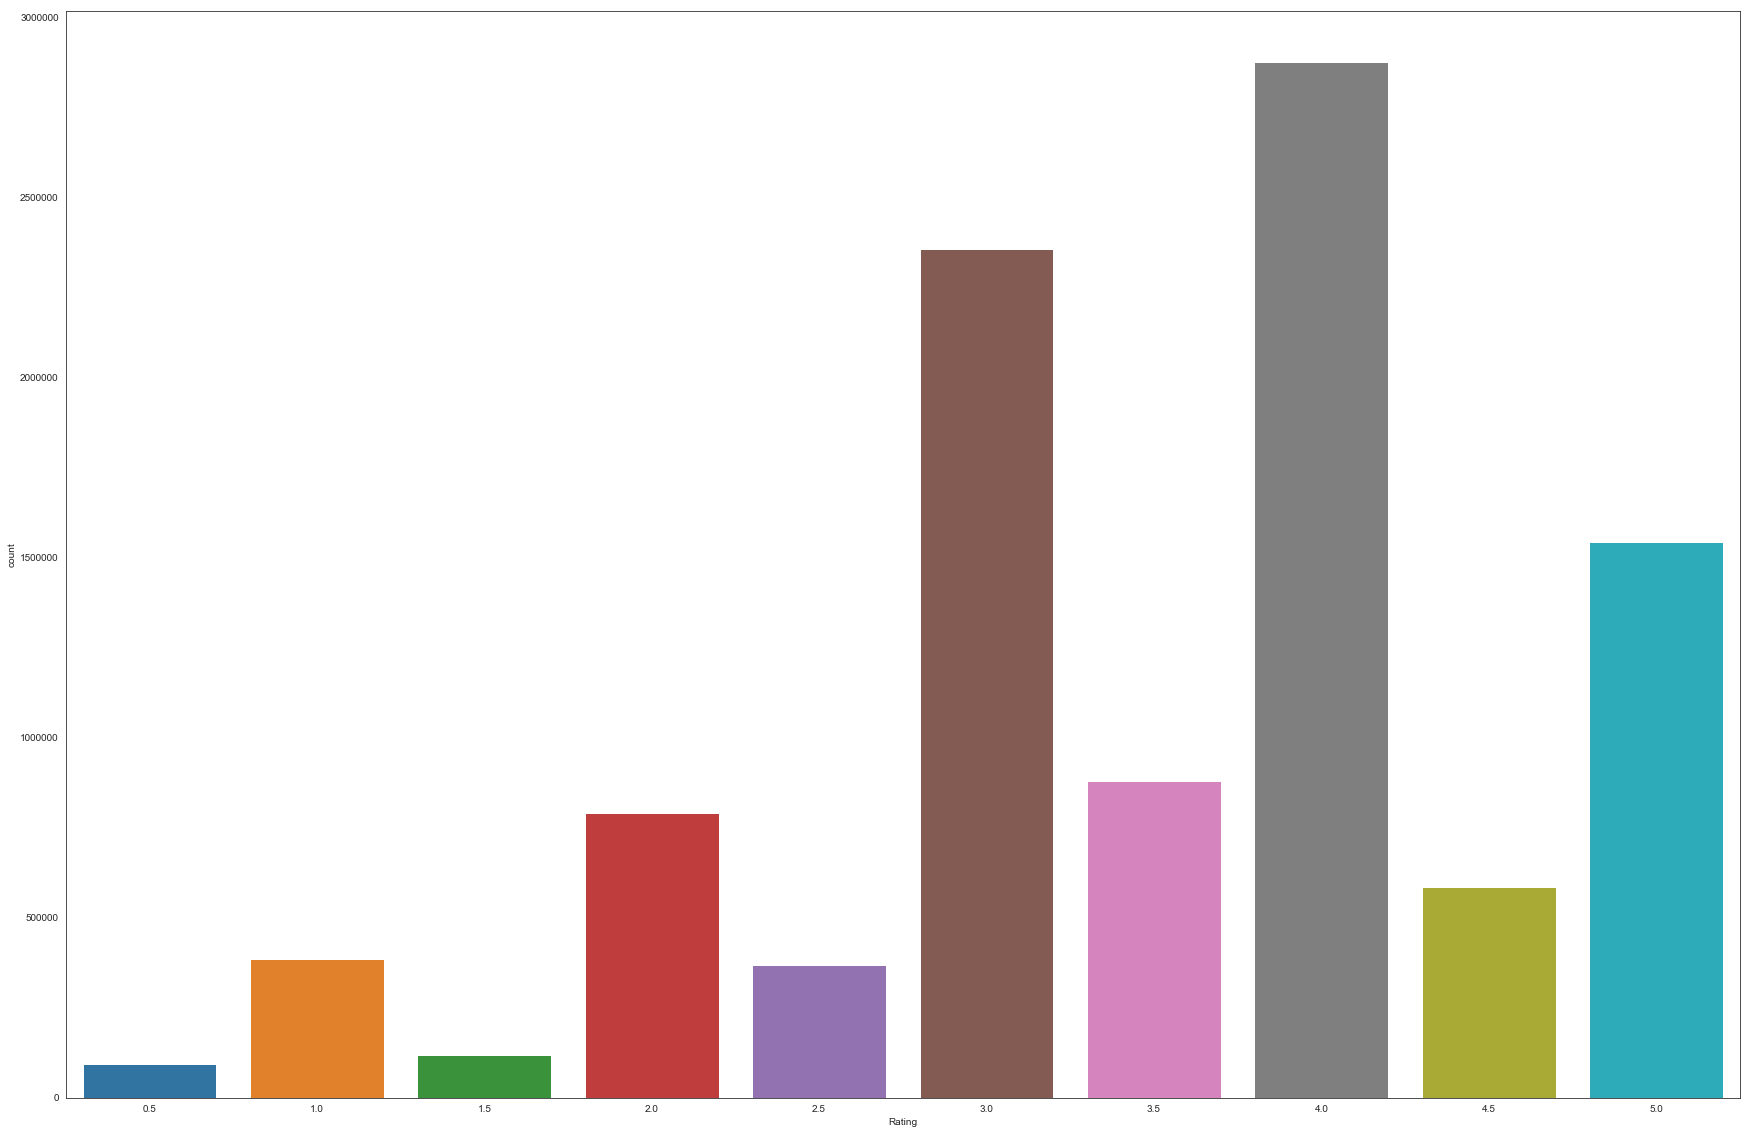

In [12]:
plt.figure(figsize=(30, 20))
sns.countplot(x=ratedata['Rating'])
#True or False: In general, half star ratings are less common than whole star ratings (e.g., there are fewer ratings of 3.5 than there are ratings of 3 or 4, etc.).

In [13]:
#plt.figure(figsize=(30, 20))
#sns.countplot(x=ratedata['UserID'])

In [14]:
ratedata = ratedata[:10000]  #segment first 10k rows

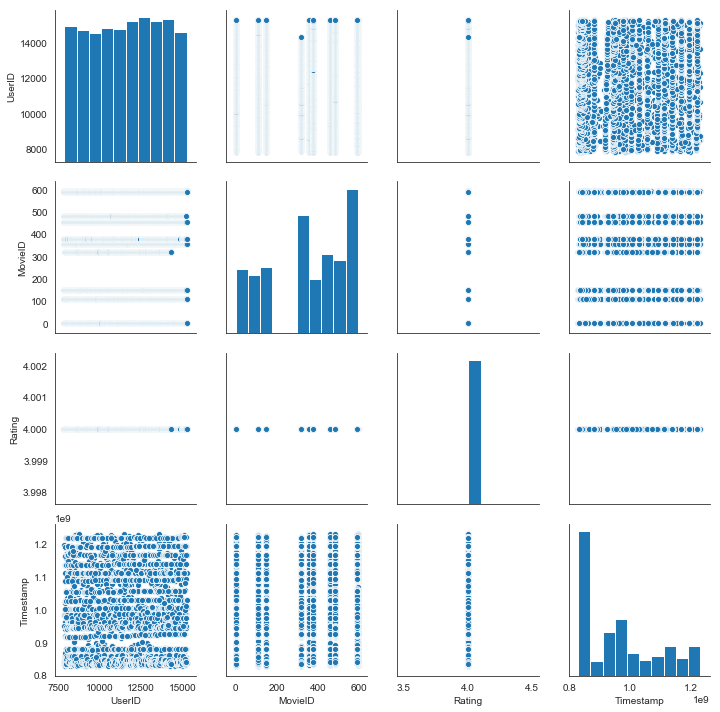

In [15]:
sns.pairplot(ratedata)

## Explore movies.csv file

In [16]:
moviedata = pd.read_csv('movies.csv')

In [17]:
moviedata.head()

,MovieID,Title,Genre
0,14,Nixon (1995),Drama
1,26,Othello (1995),Drama
2,27,Now and Then (1995),Drama
3,31,Dangerous Minds (1995),Drama
4,40,"Cry, the Beloved Country (1995)",Drama


In [18]:
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 3 columns):
MovieID    10681 non-null int64
Title      10681 non-null object
Genre      10681 non-null object
dtypes: int64(1), object(2)
memory usage: 250.4+ KB


In [19]:
#plt.figure(figsize=(30, 20))
#sns.countplot(x=moviedata['Genre'])

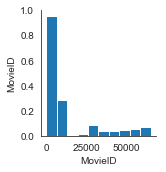

In [20]:
sns.pairplot(moviedata)

## Explore edx.csv file

In [22]:
df = pd.read_csv("edx.csv")

In [23]:
df = df[['userId','movieId','rating','timestamp','title','genres']]

In [24]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,122,5.0,838985046,Boomerang (1992),Comedy|Romance
1,1,185,5.0,838983525,"Net, The (1995)",Action|Crime|Thriller
2,1,292,5.0,838983421,Outbreak (1995),Action|Drama|Sci-Fi|Thriller
3,1,316,5.0,838983392,Stargate (1994),Action|Adventure|Sci-Fi
4,1,329,5.0,838983392,Star Trek: Generations (1994),Action|Adventure|Drama|Sci-Fi


In [25]:
df.describe()

,userId,movieId,rating,timestamp
count,9.000055e+06,9.000055e+06,9.000055e+06,9.000055e+06
mean,3.586982e+04,4.121702e+03,3.512465e+00,1.032616e+09
std,2.058525e+04,8.942108e+03,1.060331e+00,1.159668e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,1.812400e+04,6.480000e+02,3.000000e+00,9.467683e+08
50%,3.573800e+04,1.834000e+03,4.000000e+00,1.035494e+09
75%,5.360700e+04,3.626000e+03,4.000000e+00,1.126751e+09
max,7.156700e+04,6.513300e+04,5.000000e+00,1.231132e+09


In [26]:
df.info() #How many rows and columns are there in the edx dataset?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000055 entries, 0 to 9000054
Data columns (total 6 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
title        object
genres       object
dtypes: float64(1), int64(3), object(2)
memory usage: 412.0+ MB


In [27]:
df.isnull().sum() #Any NULL values?

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [28]:
df.isna().sum() #Any NaN values?

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [29]:
#Every genre is separated by a | so we simply have to call the split function on |
df['genres'] = df.genres.str.split('|')

In [30]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,122,5.0,838985046,Boomerang (1992),"[Comedy, Romance]"
1,1,185,5.0,838983525,"Net, The (1995)","[Action, Crime, Thriller]"
2,1,292,5.0,838983421,Outbreak (1995),"[Action, Drama, Sci-Fi, Thriller]"
3,1,316,5.0,838983392,Stargate (1994),"[Action, Adventure, Sci-Fi]"
4,1,329,5.0,838983392,Star Trek: Generations (1994),"[Action, Adventure, Drama, Sci-Fi]"


In [31]:
#How many movie ratings are in each of the following genres in the edx dataset?
genredf = pd.DataFrame(df.genres.tolist(), columns=['genre1','genre2','genre3','genre4','genre5','genre6','genre7','genre8'])

In [32]:
genredf.head()

,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8
0,Comedy,Romance,None,None,None,None,None,None
1,Action,Crime,Thriller,None,None,None,None,None
2,Action,Drama,Sci-Fi,Thriller,None,None,None,None
3,Action,Adventure,Sci-Fi,None,None,None,None,None
4,Action,Adventure,Drama,Sci-Fi,None,None,None,None


In [33]:
genredf.tail()

,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8
9000050,Children,Comedy,None,None,None,None,None,None
9000051,Documentary,None,None,None,None,None,None,None
9000052,Comedy,Musical,Western,None,None,None,None,None
9000053,Documentary,None,None,None,None,None,None,None
9000054,Drama,Thriller,None,None,None,None,None,None


In [34]:
genredf['genre1'].value_counts()

Action                2560545
Comedy                2437260
Drama                 1741668
Adventure              753650
Crime                  529521
Horror                 233074
Animation              218123
Children               181217
Thriller                94718
Documentary             80966
Sci-Fi                  50254
Mystery                 30536
Fantasy                 26080
Musical                 16264
Film-Noir               15811
Western                 15300
Romance                 12733
War                      2314
IMAX                       14
(no genres listed)          7
Name: genre1, dtype: int64

In [35]:
genredf['genre2'].value_counts()

Drama          1614736
Adventure      1155242
Romance         791222
Comedy          612298
Crime           602588
Thriller        439793
Sci-Fi          363458
Children        339272
Horror          331407
Mystery         252348
Animation       216570
Fantasy         171412
War             146064
Musical         124894
Film-Noir        47280
Western          37052
Documentary      12043
IMAX              1807
Name: genre2, dtype: int64

In [36]:
genredf['genre3'].value_counts()

Thriller       924972
Sci-Fi         663697
Romance        657358
Fantasy        466980
Drama          451995
Comedy         325239
War            237791
Children       208398
Mystery        205883
Crime          134792
Western         93272
Horror          85487
Musical         81495
Film-Noir       49814
Animation       32475
IMAX             2006
Documentary        57
Name: genre3, dtype: int64

In [37]:
genredf['genre4'].value_counts()

Thriller     657340
Sci-Fi       207951
Fantasy      171520
Romance      161946
Comedy       157813
Musical      144526
War          113785
Drama         88295
Mystery       57636
Crime         49795
Western       37723
Horror        33736
Children       9107
Film-Noir      5636
IMAX           3738
Name: genre4, dtype: int64

In [38]:
genredf['genre5'].value_counts()

Thriller    189898
Fantasy      76774
Musical      64550
Romance      61109
Sci-Fi       45338
Drama        13433
Crime        11019
Mystery      10599
War           9351
Comedy        8320
Horror        7525
Western        702
IMAX           550
Name: genre5, dtype: int64

In [39]:
genredf['genre6'].value_counts()

Romance     27217
Thriller    18922
Fantasy     12871
Sci-Fi      10229
Western      5345
War          1842
Musical      1351
Horror        256
IMAX           66
Name: genre6, dtype: int64

In [40]:
genredf['genre7'].value_counts()

Mystery    11330
Romance      515
Sci-Fi       256
Name: genre7, dtype: int64

In [41]:
genredf['genre8'].value_counts()

Thriller    256
Name: genre8, dtype: int64

Added each genre section to get total sum for each movie genre

In [42]:
df['rating'].value_counts() #How many zeros were given as ratings in the edx dataset

4.0    2588430
3.0    2121240
5.0    1390114
3.5     791624
2.0     711422
4.5     526736
1.0     345679
2.5     333010
1.5     106426
0.5      85374
Name: rating, dtype: int64

In [43]:
df['movieId'].nunique()  #How many different movies are in the edx dataset?

10677

In [44]:
df['userId'].nunique() #How many different users are in the edx dataset?

69878

In [45]:
df['genres']

0                                          [Comedy, Romance]
1                                  [Action, Crime, Thriller]
2                          [Action, Drama, Sci-Fi, Thriller]
3                                [Action, Adventure, Sci-Fi]
4                         [Action, Adventure, Drama, Sci-Fi]
5                                [Children, Comedy, Fantasy]
6                              [Comedy, Drama, Romance, War]
7                             [Adventure, Children, Romance]
8           [Adventure, Animation, Children, Drama, Musical]
9                                           [Action, Comedy]
10                               [Action, Romance, Thriller]
11                         [Action, Comedy, Crime, Thriller]
12                                     [Action, Comedy, War]
13                                                  [Comedy]
14                                  [Comedy, Drama, Romance]
15         [Adventure, Animation, Children, Comedy, Musical]
16                      

In [46]:
#df.apply(pd.value_counts)

In [47]:
df['genres'].value_counts() #How many movie ratings are in each of the following genres in the edx dataset?

[Drama]                                                 733296
[Comedy]                                                700889
[Comedy, Romance]                                       365468
[Comedy, Drama]                                         323637
[Comedy, Drama, Romance]                                261425
[Drama, Romance]                                        259355
[Action, Adventure, Sci-Fi]                             219938
[Action, Adventure, Thriller]                           149091
[Drama, Thriller]                                       145373
[Crime, Drama]                                          137387
[Drama, War]                                            111029
[Crime, Drama, Thriller]                                106101
[Action, Adventure, Sci-Fi, Thriller]                   105144
[Action, Crime, Thriller]                               102259
[Action, Drama, War]                                     99183
[Action, Thriller]                                     

In [48]:
df['title'].value_counts() #Which movie has the greatest number of ratings?

Pulp Fiction (1994)                                                               31362
Forrest Gump (1994)                                                               31079
Silence of the Lambs, The (1991)                                                  30382
Jurassic Park (1993)                                                              29360
Shawshank Redemption, The (1994)                                                  28015
Braveheart (1995)                                                                 26212
Fugitive, The (1993)                                                              25998
Terminator 2: Judgment Day (1991)                                                 25984
Star Wars: Episode IV - A New Hope (a.k.a. Star Wars) (1977)                      25672
Apollo 13 (1995)                                                                  24284
Batman (1989)                                                                     24277
Toy Story (1995)                

In [49]:
df['rating'].value_counts() #What are the five most given ratings in order from most to least?

4.0    2588430
3.0    2121240
5.0    1390114
3.5     791624
2.0     711422
4.5     526736
1.0     345679
2.5     333010
1.5     106426
0.5      85374
Name: rating, dtype: int64

In [50]:
#df.to_csv('new.csv',index=False)  #Save updated and cleaned csv

## Import cleaned dataset for visualization

In [2]:
df1 = pd.read_csv('new.csv')

In [3]:
df1.head()

,userId,movieId,rating,timestamp,title,genres
0,1,122,5.0,838985046,Boomerang (1992),Comedy|Romance
1,1,185,5.0,838983525,"Net, The (1995)",Action|Crime|Thriller
2,1,292,5.0,838983421,Outbreak (1995),Action|Drama|Sci-Fi|Thriller
3,1,316,5.0,838983392,Stargate (1994),Action|Adventure|Sci-Fi
4,1,329,5.0,838983392,Star Trek: Generations (1994),Action|Adventure|Drama|Sci-Fi


In [4]:
df1.tail()

,userId,movieId,rating,timestamp,title,genres
9000050,32620,33140,3.5,1173562747,Down and Derby (2005),Children|Comedy
9000051,40976,61913,3.0,1227767528,Africa addio (1966),Documentary
9000052,59269,63141,2.0,1226443318,Rockin' in the Rockies (1945),Comedy|Musical|Western
9000053,60713,4820,2.0,1119156754,Won't Anybody Listen? (2000),Documentary
9000054,64621,39429,2.5,1201248182,Confess (2005),Drama|Thriller


In [5]:
df1 = df1[:500000] #Due to laptop hardware limitation, segment only first 500000 rows

In [6]:
df1.head()

,userId,movieId,rating,timestamp,title,genres
0,1,122,5.0,838985046,Boomerang (1992),Comedy|Romance
1,1,185,5.0,838983525,"Net, The (1995)",Action|Crime|Thriller
2,1,292,5.0,838983421,Outbreak (1995),Action|Drama|Sci-Fi|Thriller
3,1,316,5.0,838983392,Stargate (1994),Action|Adventure|Sci-Fi
4,1,329,5.0,838983392,Star Trek: Generations (1994),Action|Adventure|Drama|Sci-Fi


In [7]:
df1.tail()

,userId,movieId,rating,timestamp,title,genres
499995,4237,999,4.0,1051824541,2 Days in the Valley (1996),Crime|Film-Noir
499996,4237,1027,3.0,1051722378,Robin Hood: Prince of Thieves (1991),Adventure|Drama
499997,4237,1037,3.0,1051722360,"Lawnmower Man, The (1992)",Action|Horror|Sci-Fi|Thriller
499998,4237,1136,4.0,1051726606,Monty Python and the Holy Grail (1975),Comedy
499999,4237,1196,4.0,1051726645,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi


<Figure size 2160x1440 with 0 Axes>

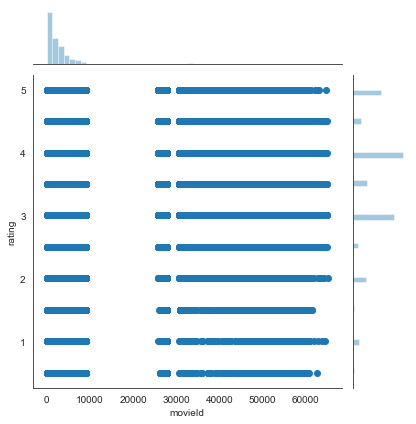

In [8]:
plt.figure(figsize=(30, 20))
sns.jointplot(x='movieId',y='rating',data=df1)

<Figure size 2160x1440 with 0 Axes>

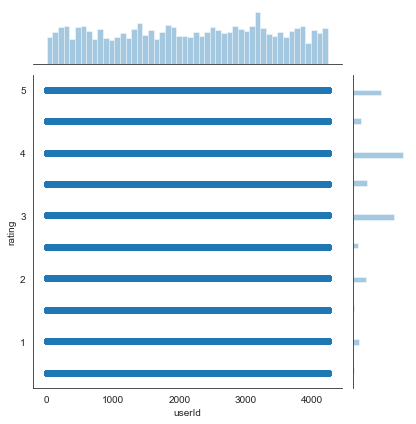

In [9]:
plt.figure(figsize=(30, 20))
sns.jointplot(x='userId',y='rating',data=df1)

In [10]:
df1.drop('timestamp', axis=1, inplace=True)

In [11]:
df1.drop('title', axis=1, inplace=True)

In [12]:
df1.drop('genres', axis=1, inplace=True)

In [13]:
df1.drop('movieId', axis=1, inplace=True)

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 2 columns):
userId    500000 non-null int64
rating    500000 non-null float64
dtypes: float64(1), int64(1)
memory usage: 7.6 MB


In [15]:
df1.head()

,userId,rating
0,1,5.0
1,1,5.0
2,1,5.0
3,1,5.0
4,1,5.0


In [16]:
#sns.lmplot(x='userId',y='rating',data=df1)

## Simple Linear Regression

In [35]:
y = df1[['rating']]  #Target variable

In [36]:
y.head()

,rating
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0


In [37]:
X = df1[['userId']]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
X_train

,userId
226114,1947
435187,3691
294452,2566
427864,3635
188822,1645
176419,1537
225346,1938
105703,902
205951,1805
213194,1860


In [41]:
X_test

,userId
104241,886
199676,1755
140199,1256
132814,1177
408697,3448
163280,1427
215758,1874
442316,3762
6940,70
382310,3222


In [42]:
X_train.shape

(350000, 1)

In [43]:
X_test.shape

(150000, 1)

In [44]:
regressor = LinearRegression(fit_intercept=True)

In [45]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [[-2.83553837e-05]]
Linear Model Coefficient (b):  [3.59152806]


In [47]:
y_predict = regressor.predict(X_test)

In [48]:
mean_squared_error(y_test, y_predict)

1.1212803971204748

In [49]:
rms = sqrt(mean_squared_error(y_test, y_predict))
print("Root Mean Square value is:b ", rms) 

Root Mean Square value is:b  1.0589052824122065


In [50]:
print(y_predict) #Predicted results

[[3.56640519]
 [3.54176436]
 [3.5559137 ]
 ...
 [3.47308762]
 [3.58293638]
 [3.57145245]]


## Multiple Linear Regression

In [51]:
df2 = pd.read_csv('new.csv')

In [52]:
df2 = df2[:500000] #Due to laptop hardware limitation, segment only first 500000 rows

In [53]:
df2.tail()

,userId,movieId,rating,timestamp,title,genres
499995,4237,999,4.0,1051824541,2 Days in the Valley (1996),Crime|Film-Noir
499996,4237,1027,3.0,1051722378,Robin Hood: Prince of Thieves (1991),Adventure|Drama
499997,4237,1037,3.0,1051722360,"Lawnmower Man, The (1992)",Action|Horror|Sci-Fi|Thriller
499998,4237,1136,4.0,1051726606,Monty Python and the Holy Grail (1975),Comedy
499999,4237,1196,4.0,1051726645,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi


In [54]:
df2.drop('timestamp', axis=1, inplace=True)
df2.drop('title', axis=1, inplace=True)
df2.drop('genres', axis=1, inplace=True)

In [55]:
df2.head()

,userId,movieId,rating
0,1,122,5.0
1,1,185,5.0
2,1,292,5.0
3,1,316,5.0
4,1,329,5.0


In [56]:
y = df2['rating']

In [57]:
X = df2[['userId', 'movieId']]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
X_train.shape

(400000, 2)

In [60]:
X_test.shape

(100000, 2)

In [61]:
regressor2 = LinearRegression(fit_intercept=True)

In [62]:
regressor2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
print('Linear Model Coefficients (m)', regressor2.coef_)
print('Linear Model Coefficients (b)', regressor2.intercept_)

Linear Model Coefficients (m) [-2.85413157e-05 -7.57854535e-07]
Linear Model Coefficients (b) 3.594964440683402


In [64]:
y_predict = regressor2.predict(X_test)

In [65]:
y_predict

array([3.56750103, 3.54341708, 3.55728027, ..., 3.55252973, 3.57742356,
       3.53431723])

Text(0.5, 1.0, 'Multiple Linear Regression Predictions')

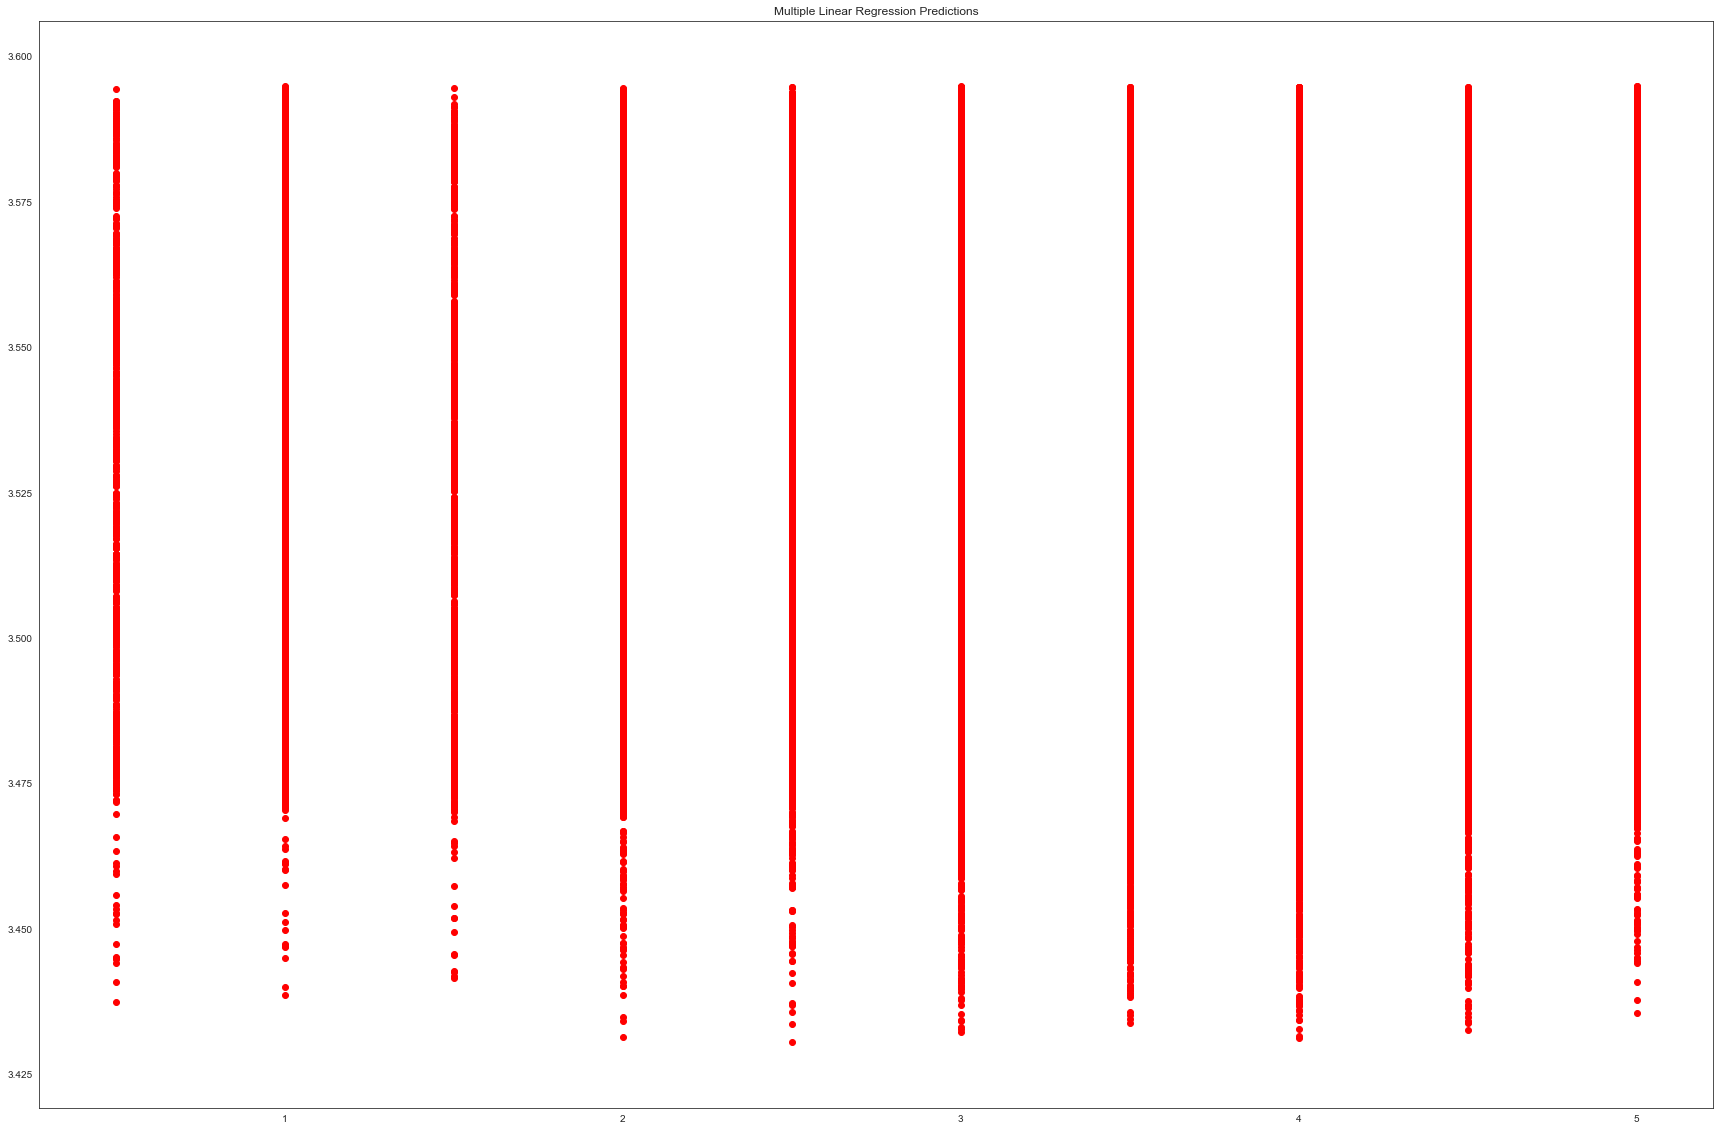

In [66]:
plt.figure(figsize=(30,20))
plt.scatter(y_test, y_predict, color = 'r')
plt.title('Multiple Linear Regression Predictions')

In [67]:
rms = sqrt(mean_squared_error(y_test, y_predict))
print("Root Mean Square value is:b ", rms) 

Root Mean Square value is:b  1.0602279810330444


In [68]:
r2 = r2_score(y_test, y_predict)
print("R2 score is: ", r2)

R2 score is:  0.0010416484456293729


## Artificial Neural Network

In [69]:
df3 = pd.read_csv('new.csv')

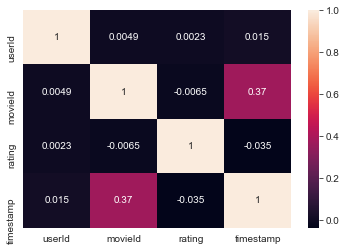

In [70]:
sns.heatmap(df3.corr(),annot=True)

In [71]:
df3 = df3[:500000] #Due to laptop hardware limitation, segment only first 500000 rows

In [72]:
df3.head()

,userId,movieId,rating,timestamp,title,genres
0,1,122,5.0,838985046,Boomerang (1992),Comedy|Romance
1,1,185,5.0,838983525,"Net, The (1995)",Action|Crime|Thriller
2,1,292,5.0,838983421,Outbreak (1995),Action|Drama|Sci-Fi|Thriller
3,1,316,5.0,838983392,Stargate (1994),Action|Adventure|Sci-Fi
4,1,329,5.0,838983392,Star Trek: Generations (1994),Action|Adventure|Drama|Sci-Fi


In [73]:
df3.drop('timestamp', axis=1, inplace=True)
df3.drop('title', axis=1, inplace=True)
df3.drop('genres', axis=1, inplace=True)

In [74]:
X = df3[['userId','movieId']]

In [75]:
y = df3[['rating']]

In [76]:
X.shape

(500000, 2)

In [77]:
y.shape

(500000, 1)

In [78]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [79]:
X_scaled.shape

(500000, 2)

In [80]:
y = y.values.reshape(-1,1)

In [81]:
y_scaled = scaler.fit_transform(y)

In [82]:
y_scaled

array([[1.        ],
       [1.        ],
       [1.        ],
       ...,
       [0.55555556],
       [0.77777778],
       [0.77777778]])

In [83]:
y_scaled.shape

(500000, 1)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2)

In [85]:
X_train.shape

(400000, 2)

In [86]:
X_test.shape

(100000, 2)

In [88]:
model = Sequential()
model.add(Dense(50, input_dim = 2, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation = 'linear'))

In [89]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                150       
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 2,751
Trainable params: 2,751
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [92]:
epochs_hist = model.fit(X_train, y_train, epochs = 50, batch_size = 50, validation_split = 0.2)

W0722 09:47:54.198905  7084 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0722 09:47:54.277045  7084 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 320000 samples, validate on 80000 samples
Epoch 1/50
320000/320000 [==============================] - 6s 20us/step - loss: 0.0568 - val_loss: 0.0548
Epoch 2/50
320000/320000 [==============================] - 6s 18us/step - loss: 0.0555 - val_loss: 0.0547
Epoch 3/50
320000/320000 [==============================] - 6s 18us/step - loss: 0.0554 - val_loss: 0.0557
Epoch 4/50
320000/320000 [==============================] - 6s 18us/step - loss: 0.0554 - val_loss: 0.0547
Epoch 5/50
320000/320000 [==============================] - 6s 18us/step - loss: 0.0554 - val_loss: 0.0547
Epoch 6/50
320000/320000 [==============================] - 6s 18us/step - loss: 0.0554 - val_loss: 0.0552
Epoch 7/50
320000/320000 [==============================] - 6s 18us/step - loss: 0.0553 - val_loss: 0.0547
Epoch 8/50
320000/320000 [==============================] - 6s 18us/step - loss: 0.0553 - val_loss: 0.0547
Epoch 9/50
320000/320000 [==============================] - 6s 19us/step - loss: 0.0553 - val

In [93]:
y_predict = model.predict(X_test)

In [94]:
y_predict

array([[0.6715395 ],
       [0.7123352 ],
       [0.71521664],
       ...,
       [0.6784505 ],
       [0.67522854],
       [0.64636934]], dtype=float32)

In [95]:
#Unscale back
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

In [96]:
y_predict_orig

array([[3.5219276],
       [3.7055085],
       [3.7184749],
       ...,
       [3.5530274],
       [3.5385284],
       [3.408662 ]], dtype=float32)

In [97]:
rms = sqrt(mean_squared_error(y_test_orig, y_predict_orig))
print("Root Mean Square value is: ", rms)

Root Mean Square value is:  1.0465580834637223


In [98]:
r2 = r2_score(y_test_orig, y_predict_orig)
print("R2 score is: ", r2)

R2 score is:  0.02235936331211219


## Simple Recommender System - Recommending Similar Movies

In [99]:
df4 = pd.read_csv('new.csv')

In [100]:
df4.head()

,userId,movieId,rating,timestamp,title,genres
0,1,122,5.0,838985046,Boomerang (1992),Comedy|Romance
1,1,185,5.0,838983525,"Net, The (1995)",Action|Crime|Thriller
2,1,292,5.0,838983421,Outbreak (1995),Action|Drama|Sci-Fi|Thriller
3,1,316,5.0,838983392,Stargate (1994),Action|Adventure|Sci-Fi
4,1,329,5.0,838983392,Star Trek: Generations (1994),Action|Adventure|Drama|Sci-Fi


In [101]:
df4 = df4[:500000] #Due to laptop hardware limitation, segment only first 500000 rows

In [102]:
df4.shape

(500000, 6)

In [103]:
df4.drop('timestamp', axis=1, inplace=True)
df4.drop('genres', axis=1, inplace=True)

In [104]:
df4.head()

,userId,movieId,rating,title
0,1,122,5.0,Boomerang (1992)
1,1,185,5.0,"Net, The (1995)"
2,1,292,5.0,Outbreak (1995)
3,1,316,5.0,Stargate (1994)
4,1,329,5.0,Star Trek: Generations (1994)


In [105]:
df4.groupby('title')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Round Midnight (1986),4.0,3.625000,0.750000,3.0,3.000,3.50,4.125,4.5
'Til There Was You (1997),25.0,2.880000,1.013246,1.0,2.000,3.00,4.000,4.0
"'burbs, The (1989)",87.0,2.931034,0.893036,1.0,2.000,3.00,3.750,5.0
'night Mother (1986),11.0,3.272727,1.103713,2.0,2.500,3.00,4.000,5.0
*batteries not included (1987),43.0,3.127907,0.945497,1.0,2.500,3.00,3.500,5.0
...All the Marbles (a.k.a. The California Dolls) (1981),2.0,2.750000,1.060660,2.0,2.375,2.75,3.125,3.5
...And God Created Woman (Et Dieu... créa la femme) (1956),2.0,3.500000,0.707107,3.0,3.250,3.50,3.750,4.0
...And God Spoke (1993),3.0,4.000000,1.000000,3.0,3.500,4.00,4.500,5.0
...And Justice for All (1979),29.0,3.862069,0.895390,2.0,3.500,4.00,4.000,5.0


In [106]:
ratings_df_mean = df4.groupby('title')['rating'].describe()['mean']

In [107]:
ratings_df_mean   #Average mean ratings for each movie

title
'Round Midnight (1986)                                                     3.625000
'Til There Was You (1997)                                                  2.880000
'burbs, The (1989)                                                         2.931034
'night Mother (1986)                                                       3.272727
*batteries not included (1987)                                             3.127907
...All the Marbles (a.k.a. The California Dolls) (1981)                    2.750000
...And God Created Woman (Et Dieu... créa la femme) (1956)                 3.500000
...And God Spoke (1993)                                                    4.000000
...And Justice for All (1979)                                              3.862069
1-900 (06) (1994)                                                          4.000000
10 (1979)                                                                  2.750000
10 Items or Less (2006)                                               

In [108]:
ratings_df_count = df4.groupby('title')['rating'].describe()['count']

In [109]:
ratings_df_count #no of ratings for each movie

title
'Round Midnight (1986)                                                        4.0
'Til There Was You (1997)                                                    25.0
'burbs, The (1989)                                                           87.0
'night Mother (1986)                                                         11.0
*batteries not included (1987)                                               43.0
...All the Marbles (a.k.a. The California Dolls) (1981)                       2.0
...And God Created Woman (Et Dieu... créa la femme) (1956)                    2.0
...And God Spoke (1993)                                                       3.0
...And Justice for All (1979)                                                29.0
1-900 (06) (1994)                                                             4.0
10 (1979)                                                                    12.0
10 Items or Less (2006)                                                       7.0
10 Rilling

In [110]:
ratings_mean_count_df = pd.concat([ratings_df_count, ratings_df_mean], axis = 1)

In [111]:
ratings_mean_count_df

,count,mean
title,,
'Round Midnight (1986),4.0,3.625000
'Til There Was You (1997),25.0,2.880000
"'burbs, The (1989)",87.0,2.931034
'night Mother (1986),11.0,3.272727
*batteries not included (1987),43.0,3.127907
...All the Marbles (a.k.a. The California Dolls) (1981),2.0,2.750000
...And God Created Woman (Et Dieu... créa la femme) (1956),2.0,3.500000
...And God Spoke (1993),3.0,4.000000
...And Justice for All (1979),29.0,3.862069


In [112]:
ratings_mean_count_df.reset_index()

,title,count,mean
0,'Round Midnight (1986),4.0,3.625000
1,'Til There Was You (1997),25.0,2.880000
2,"'burbs, The (1989)",87.0,2.931034
3,'night Mother (1986),11.0,3.272727
4,*batteries not included (1987),43.0,3.127907
5,...All the Marbles (a.k.a. The California Doll...,2.0,2.750000
6,...And God Created Woman (Et Dieu... créa la f...,2.0,3.500000
7,...And God Spoke (1993),3.0,4.000000
8,...And Justice for All (1979),29.0,3.862069
9,1-900 (06) (1994),4.0,4.000000


Text(0.5, 1.0, 'Histogram for mean ratings')

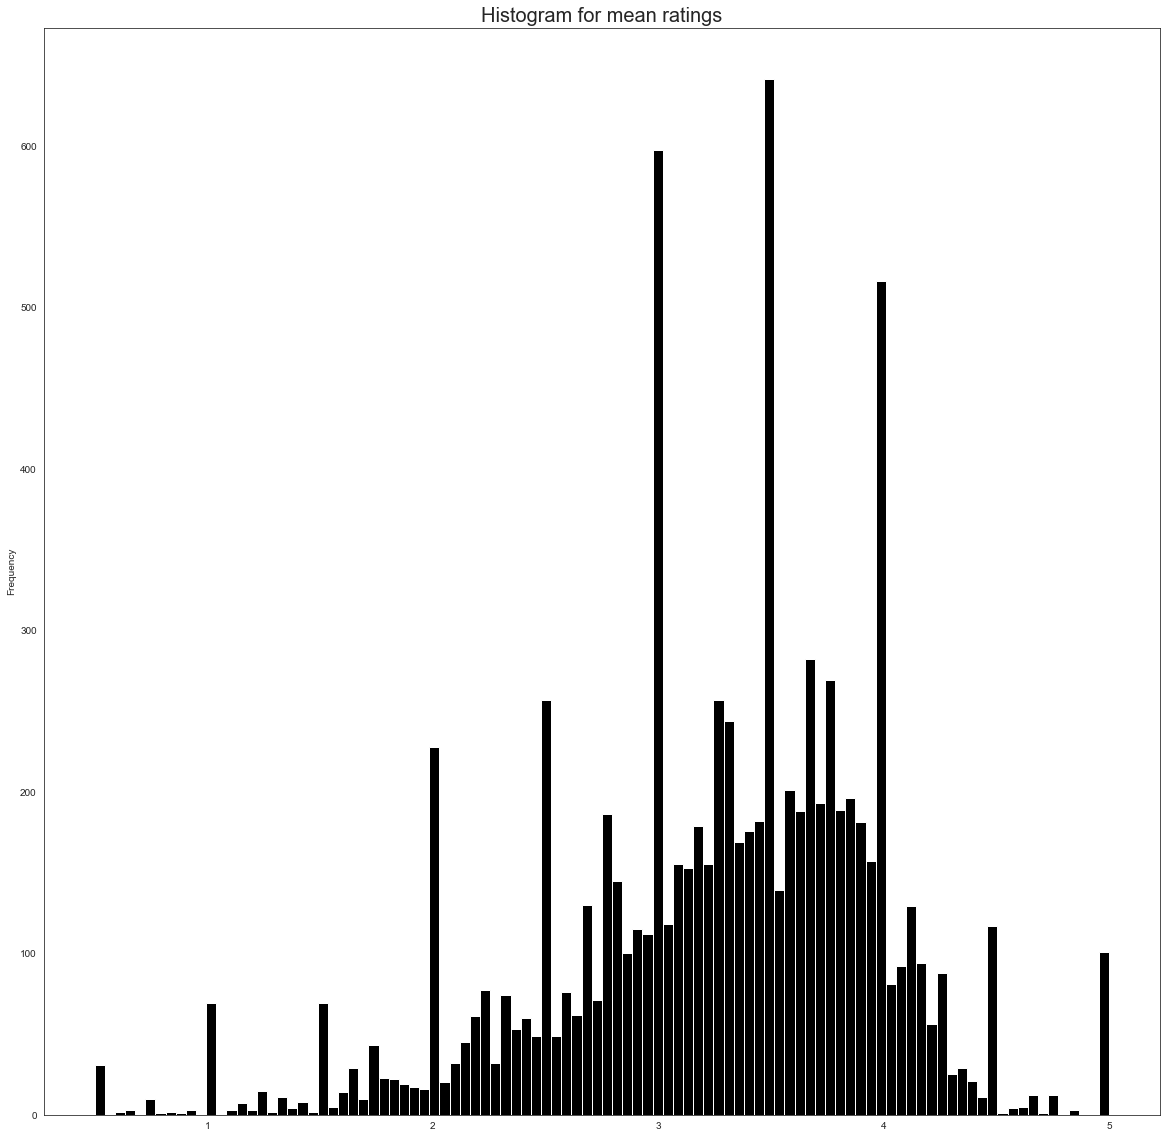

In [113]:
plt.figure(figsize=(20,20))
ratings_mean_count_df['mean'].plot(bins=100, kind='hist', color = 'black') 
plt.title("Histogram for mean ratings", fontsize=20)

Text(0.5, 1.0, 'Histogram for count ratings')

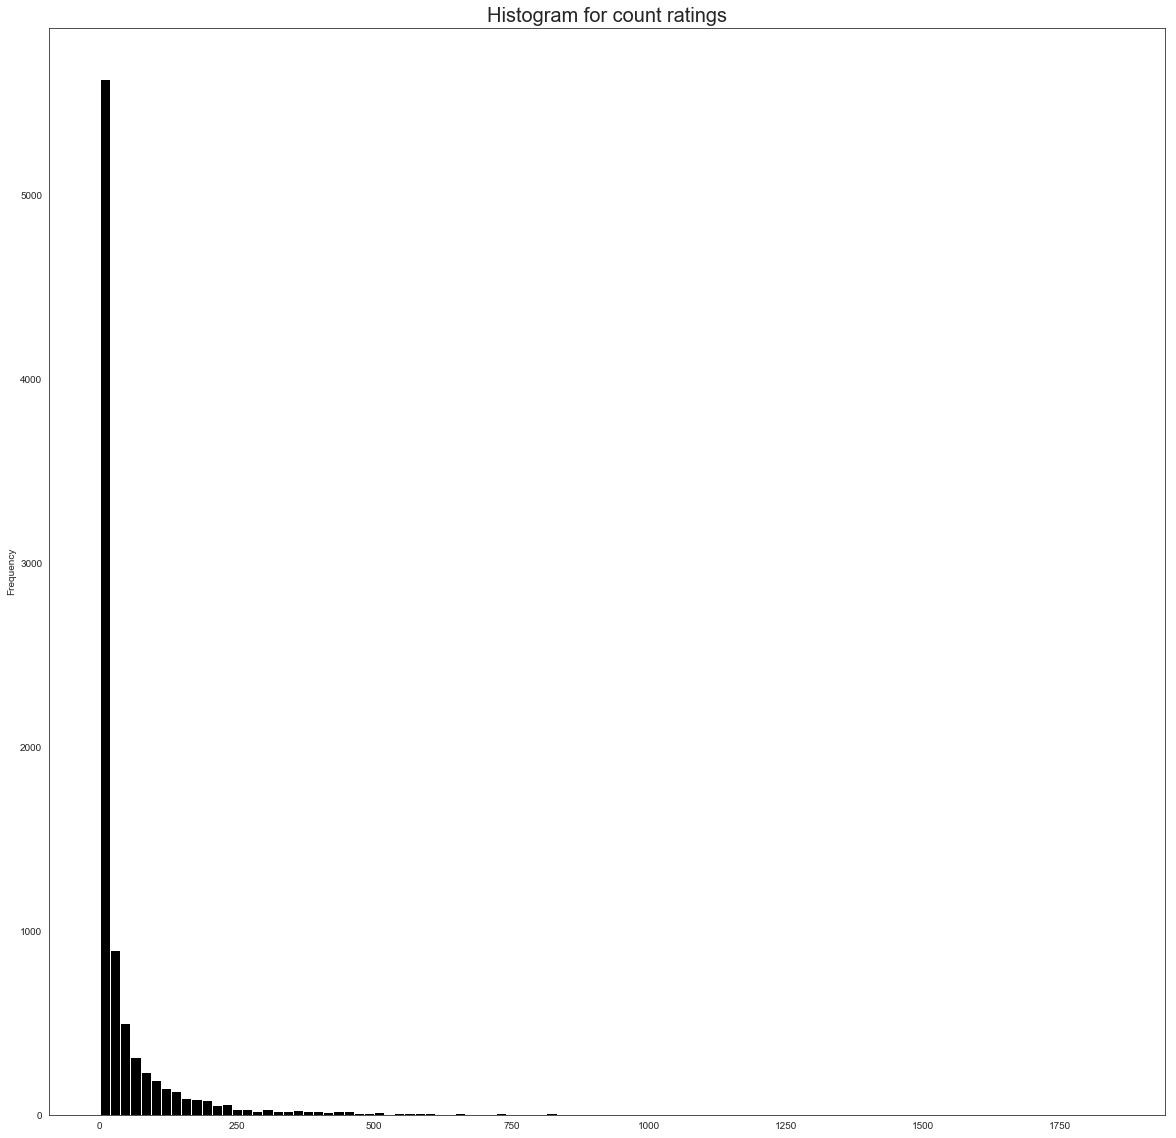

In [114]:
plt.figure(figsize=(20,20))
ratings_mean_count_df['count'].plot(bins=100, kind='hist', color = 'black') 
plt.title("Histogram for count ratings", fontsize=20)

In [115]:
ratings_mean_count_df[ratings_mean_count_df['mean'] == 5]  #Low counts for highest rated movies

,count,mean
title,,
Anna (1996),1.0,5.0
"Ay, Carmela! (¡Ay, Carmela!) (1990)",1.0,5.0
Ball of Fire (1941),1.0,5.0
Battling Butler (1926),2.0,5.0
"Big Clock, The (1948)",1.0,5.0
"Blue Kite, The (Lan feng zheng) (1993)",1.0,5.0
Breathing Room (1996),1.0,5.0
Brother of Sleep (Schlafes Bruder) (1995),1.0,5.0
California Split (1974),1.0,5.0


In [116]:
ratings_mean_count_df.sort_values('count', ascending = False).head(100) #Top 100 has highest count and mean

,count,mean
title,,
"Silence of the Lambs, The (1991)",1849.0,4.247431
Pulp Fiction (1994),1793.0,4.144172
Forrest Gump (1994),1740.0,4.013793
Jurassic Park (1993),1621.0,3.677051
"Shawshank Redemption, The (1994)",1598.0,4.485294
Star Wars: Episode IV - A New Hope (a.k.a. Star Wars) (1977),1524.0,4.267388
Braveheart (1995),1486.0,4.117766
"Fugitive, The (1993)",1439.0,4.026060
Terminator 2: Judgment Day (1991),1433.0,3.959525


In [117]:
#Create a matrix consists of each user and what movies they watched
#NaNs means they never watched
userid_movietitle_matrix = df4.pivot_table(index = 'userId', columns = 'title', values = 'rating')

In [118]:
userid_movietitle_matrix

title,'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),*batteries not included (1987),...All the Marbles (a.k.a. The California Dolls) (1981),...And God Created Woman (Et Dieu... créa la femme) (1956),...And God Spoke (1993),...And Justice for All (1979),1-900 (06) (1994),...,Zoot Suit (1981),Zorba the Greek (Alexis Zorbas) (1964),"Zorro, the Gay Blade (1981)",Zulu (1964),Zus & Zo (2001),[Rec] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx: State of the Union (2005),"Âge d'or, L' (1930)"
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,4.0,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
#userid_movietitle_matrix.sort_values('num of ratings', ascending=False).head(10)

In [121]:
#Use Forrest Gump as Reference Movie
#Find any movies similar to Forrest Gump

In [122]:
gump = userid_movietitle_matrix['Forrest Gump (1994)']

In [123]:
gump.head()

userId
1    5.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [124]:
similartogump = userid_movietitle_matrix.corrwith(gump)

In [125]:
similartogump

title
'Round Midnight (1986)                                                    -0.406181
'Til There Was You (1997)                                                 -0.124712
'burbs, The (1989)                                                        -0.112154
'night Mother (1986)                                                      -0.186339
*batteries not included (1987)                                             0.584178
...All the Marbles (a.k.a. The California Dolls) (1981)                         NaN
...And God Created Woman (Et Dieu... créa la femme) (1956)                      NaN
...And God Spoke (1993)                                                         NaN
...And Justice for All (1979)                                              0.100536
1-900 (06) (1994)                                                               NaN
10 (1979)                                                                 -0.139195
10 Items or Less (2006)                                               

In [126]:
#Cleaning up and save into new dataframe
corr_gump = pd.DataFrame(similartogump,columns=['Correlation'])
corr_gump.dropna(inplace=True)

In [127]:
corr_gump.head()

,Correlation
title,
'Round Midnight (1986),-0.406181
'Til There Was You (1997),-0.124712
"'burbs, The (1989)",-0.112154
'night Mother (1986),-0.186339
*batteries not included (1987),0.584178


In [128]:
corr_gump.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
"Swarm, The (1978)",1.0
Two Brothers (2004),1.0
Town & Country (2001),1.0
"Memphis Belle: A Story of a Flying Fortress, The (1944)",1.0
"Memory of a Killer, The (De Zaak Alzheimer) (2003)",1.0
Me Without You (2001),1.0
Train of Life (Train De Vie) (1998),1.0
Man on Wire (2008),1.0
American Me (1992),1.0


In [130]:
corr_gump

,Correlation
title,
'Round Midnight (1986),-0.406181
'Til There Was You (1997),-0.124712
"'burbs, The (1989)",-0.112154
'night Mother (1986),-0.186339
*batteries not included (1987),0.584178
...And Justice for All (1979),0.100536
10 (1979),-0.139195
10 Items or Less (2006),0.427425
10 Rillington Place (1971),0.471056


What the system does is use correlation method to compare to each movie item and select the higher scores to recommend movie to users based from ratings. Example 1000 Eyes of Dr. Mabuse, The (Tausend Augen des Dr. Mabuse, Die) (1960) will be recommended to users who have watched Forrest Gump

## Using scikit Surprise package

In [133]:
df5 = pd.read_csv('new.csv')

In [134]:
df5.head()

,userId,movieId,rating,timestamp,title,genres
0,1,122,5.0,838985046,Boomerang (1992),Comedy|Romance
1,1,185,5.0,838983525,"Net, The (1995)",Action|Crime|Thriller
2,1,292,5.0,838983421,Outbreak (1995),Action|Drama|Sci-Fi|Thriller
3,1,316,5.0,838983392,Stargate (1994),Action|Adventure|Sci-Fi
4,1,329,5.0,838983392,Star Trek: Generations (1994),Action|Adventure|Drama|Sci-Fi


In [135]:
df5 = df5[:500000] #Due to laptop hardware limitation, segment only first 500000 rows

In [136]:
df5.drop('timestamp', axis=1, inplace=True)
df5.drop('genres', axis=1, inplace=True)
df5.drop('title', axis=1, inplace=True)

In [137]:
df5.head()

,userId,movieId,rating
0,1,122,5.0
1,1,185,5.0
2,1,292,5.0
3,1,316,5.0
4,1,329,5.0


In [138]:
reader = Reader()

In [139]:
data = Dataset.load_from_df(df5, reader)

In [140]:
trainset, testset = train_test_split(data, test_size=0.20)

In [141]:
algo = SVD() #Use singular value decomposition (SVD)

In [142]:
algo.fit(trainset)

In [143]:
predictions = algo.test(testset)

In [144]:
predictions

[Prediction(uid=765, iid=357, r_ui=4.0, est=4.284782686887061, details={'was_impossible': False}),
 Prediction(uid=5, iid=780, r_ui=1.0, est=3.086532516915338, details={'was_impossible': False}),
 Prediction(uid=2237, iid=1981, r_ui=1.0, est=1.9110216642786226, details={'was_impossible': False}),
 Prediction(uid=1880, iid=2026, r_ui=3.0, est=3.375961648455713, details={'was_impossible': False}),
 Prediction(uid=2896, iid=2003, r_ui=5.0, est=4.203649982897146, details={'was_impossible': False}),
 Prediction(uid=2676, iid=924, r_ui=4.0, est=4.200842382005633, details={'was_impossible': False}),
 Prediction(uid=2286, iid=112, r_ui=3.0, est=3.633592668343769, details={'was_impossible': False}),
 Prediction(uid=1470, iid=610, r_ui=5.0, est=3.8767074310343737, details={'was_impossible': False}),
 Prediction(uid=3200, iid=5060, r_ui=4.0, est=3.8147292737718086, details={'was_impossible': False}),
 Prediction(uid=1294, iid=543, r_ui=2.5, est=2.988190758205171, details={'was_impossible': False}

In [145]:
accuracy.rmse(predictions)

RMSE: 0.8566


0.8566228080925143

The RMSE value is 0.8566 which is the best of all, hence this model is selected

## Testing the algorithm on validation set

In [146]:
df6 = pd.read_csv('validation.csv')

In [147]:
df6.shape

(999999, 7)

In [148]:
df6.head()

,Unnamed: 0,userId,movieId,rating,timestamp,title,genres
0,1,1,231,5.0,838983392,Dumb & Dumber (1994),Comedy
1,2,1,480,5.0,838983653,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
2,3,1,586,5.0,838984068,Home Alone (1990),Children|Comedy
3,4,2,151,3.0,868246450,Rob Roy (1995),Action|Drama|Romance|War
4,5,2,858,2.0,868245645,"Godfather, The (1972)",Crime|Drama


In [149]:
df6 = df6[['userId','movieId','rating']]

In [150]:
df6.head()

,userId,movieId,rating
0,1,231,5.0
1,1,480,5.0
2,1,586,5.0
3,2,151,3.0
4,2,858,2.0


In [151]:
reader = Reader()

In [152]:
data1 = Dataset.load_from_df(df6, reader)

In [153]:
trainset, testset = train_test_split(data1, test_size=0.20)

In [154]:
algo = SVD()

In [155]:
algo.fit(trainset)

In [156]:
predictions1 = algo.test(testset)

In [157]:
accuracy.rmse(predictions1)

RMSE: 0.9041


0.904119357934113

The RMSE value is 0.9041.

## Results

Simple Linear Regression:1.058<br>
Multiple Linear Regression:1.060<br>
Artificial Neural Network:1.046<br>
Simple Recommender System:Not available<br>
Scikit Surprise: 0.9041

## Conclusions

Recommender systems are complex and varied. It requires deep understanding of mathematics. Since machine learning and deep learning are continously improving, we expect new algorithms and new Python libraries that are written to make them perform more better and efficient.